# Example for SOMClassifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# --- for running the script without pip
import sys
sys.path.append("../")
# ---

import susi
from susi.SOMPlots import plot_umatrix, plot_estimation_map

## Get data

In [2]:
n_features = 5

# get the data
X, y = make_classification(n_features=n_features, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1, shuffle=True)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)

(50, 5) (50, 5)


## Classify and plot

In [3]:
# NBVAL_IGNORE_OUTPUT

som = susi.SOMClassifier(
    n_rows=40,
    n_columns=40,
    n_iter_unsupervised=1000,
    n_iter_supervised=1000,
    random_state=0)
som.fit(X_train, y_train)
y_pred = som.predict(X_test)
print("Accuracy: {0:.1f} %".format(som.score(X_test, y_test)*100))

Accuracy: 86.0 %


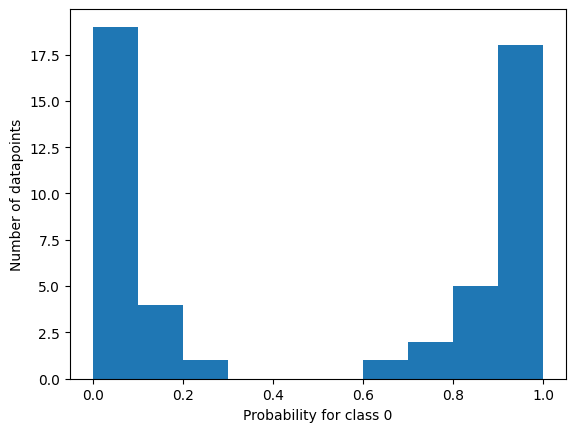

In [4]:
# calculate probabilities
proba = som.predict_proba(X_test)

# plot probabilities
class_index = 0
plt.hist(proba[:, class_index])
plt.xlabel(f"Probability for class {class_index}")
plt.ylabel("Number of datapoints")
plt.show()

## Plots
### Plot u-Matrix

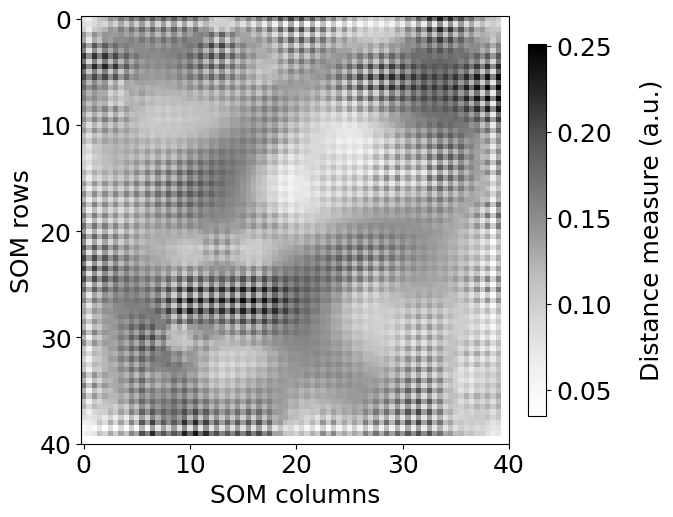

In [5]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 40, 40)
plt.show()

### Plot estimation map

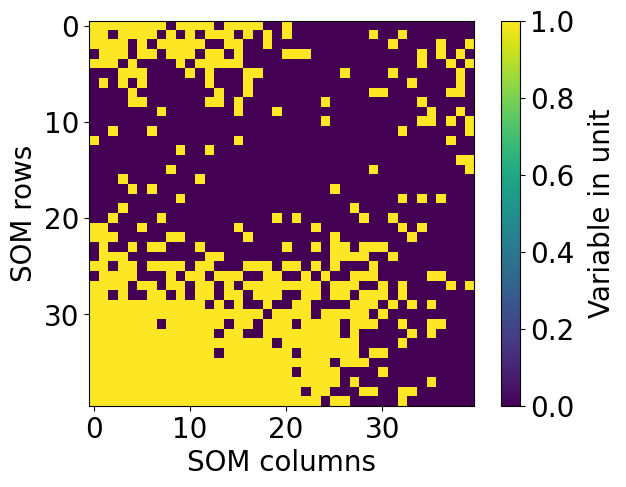

In [6]:
estimation_map = som.get_estimation_map().squeeze()
plot_estimation_map(estimation_map)
plt.show()